<b><center style="font-size:250%; font-family:verdana;">Rectangular Maze Image Generator</center></b>

<hr class="solid">

<b><center style="font-size:200%; font-family:verdana;">1. Introduction</center></b>

<p style="font-family:verdana;"> Mazes can be a fun way to challenge the mind and solve complex problems. In this notebook, we will create an interactive Rectangular Maze Image Generator that can generate a random rectangular maze of any given width and height. The maze will be generated using the Depth-First Search (DFS) algorithm, and we will create a visual representation of the maze as well. By the end of this notebook, you will be able to generate your own mazes and visualize them in an image format. </p>

<hr class="solid">

<b><center style="font-size:200%; font-family:verdana;">2. Maze Size Configuration</center></b>

<p style="font-family:verdana;"> In this section, we create and display two interactive text widgets. These widgets will allow you to specify the dimensions of your maze. The minimum allowable size is 10, while the maximum is 50. Feel free to enter the width and height as per your needs. </p>

In [1]:
from rectangular_maze.widgets import width_widget, height_widget

# Display widgets
display(width_widget)
display(height_widget)

BoundedIntText(value=30, description='Maze Width:', max=50, min=10)

BoundedIntText(value=30, description='Maze Height:', max=50, min=10)

<hr class="solid">

<b><center style="font-size:200%; font-family:verdana;">3. Maze Generation and Visualization</center></b>

<p style="font-family:verdana;">Once the width and height of the maze are specified, the actual maze generation begins. The maze is generated using a depth-first search approach, which ensures that there is a valid path between any two points in the maze.</p>

<p style="font-family:verdana;">This process is not only computational but also visual. Once you run the following cell, a new pygame window will be opened up to show a live visualization of the maze generation. Each cell in the maze is either a wall (represented in black) or a pathway (represented in white).</p>

<p style="font-family:verdana;">This live visualization provides a fascinating insight into how the maze is incrementally created, allowing us to watch as the algorithm navigates through the grid of cells, backtracks when it hits a dead end, and eventually completes the full maze.</p>

<p style="font-family:verdana;">In the Pygame window, cells and walls are color-coded to illustrate the status of each cell:</p>

- <b>Black cells</b> are unvisited cells, the areas that the algorithm has yet to explore.
- <b>Red cells</b> represent visited cells, the areas that the algorithm has explored.
- <b>White cells</b> signify backtracked cells, where the algorithm has returned after reaching a dead end.
- <b>Green cells</b> denote the current cell, where the algorithm is currently exploring.

In [2]:
from rectangular_maze.settings import WIDTH_CELL_COUNT, HEIGHT_CELL_COUNT, CELL_SIZE
from rectangular_maze.generate import generate_maze

# The `generate_maze` function performs the maze generation and returns 
# the final maze grid and a list of Pygame frames for the animation
grid, frames, start, end = generate_maze(WIDTH_CELL_COUNT, HEIGHT_CELL_COUNT, CELL_SIZE)

pygame 2.5.0 (SDL 2.28.0, Python 3.9.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


<hr class="solid">

<b><center style="font-size:200%; font-family:verdana;">4. Save and Display the Maze Generation as a GIF</center></b>

<p style="font-family:verdana;">If you'd like to record the maze generation process, there is an option to save it as a GIF. This is especially useful if you'd like to review the process later, share it with others, or simply enjoy the captivating visuals of your maze being built.</p>
<p style="font-family:verdana;">To do so, run the following code cell. It will save the maze generation process as a "maze.gif" file in the maze_example directory. The GIF will also be displayed in the cell output for your immediate viewing.</p>

In [ ]:
from IPython.display import Image
from rectangular_maze.gif import maze_gif

# Create the GIF 
maze_gif(frames)

# Load the GIF 
gif_path = "maze_example/maze.gif"
gif = Image(filename=gif_path)

# Display the GIF
display(gif)

<hr class="solid">

<b><center style="font-size:200%; font-family:verdana;">5. Rendering and Saving the Maze as an Image</center></b>

<p style="font-family:verdana;">With the maze fully generated and visualized interactively, it's now time to render the maze as a static image, which allows for easier sharing and further analysis. For this purpose, we are going to use the `draw_maze` function.</p>

<p style="font-family:verdana;">The function `draw_maze` is designed to iterate over the grid of the maze, examining each cell and painting it in the image accordingly. It uses a simple color scheme: black for the walls and white for the pathways. This results in a clear and concise image representation of our maze.</p>

<p style="font-family:verdana;">After the image is generated, it is saved in the maze_example directory with the filename "maze.png". Therefore, you will be able to find the image in the same directory where your notebook is located. The image will also be displayed in the cell output for your immediate viewing.</p>

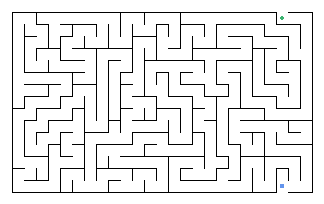

In [3]:
from rectangular_maze.draw import draw_maze
from IPython.display import Image, display

# Draw the maze image
draw_maze(grid, start, end, filename="maze_example/maze.png", cell_size=12)

# Load image from file
img = Image(filename="maze_example/maze.png")

# Display the image
display(img)

<hr class="solid">

<b><center style="font-size:200%; font-family:verdana;">6. Analyzing the Shortest Path in the Maze</center></b>

<p style="font-family:verdana;">After rendering the maze, the next step is to find and visualize the shortest path through the maze. To do this, we use the A* pathfinding algorithm, which is a well-known algorithm in computer science used for pathfinding and graph traversal.</p>

<p style="font-family:verdana;">We first use the `a_star` function to calculate the shortest path from the starting point to the ending point of the maze. This function uses heuristics to prioritize the path that likely leads to the end point faster, resulting in an optimal solution. The function returns a list representing the shortest path from the start cell to the end cell.</p>

<p style="font-family:verdana;">After obtaining the shortest path, we then visualize it on the maze image using the `draw_maze` function again, but this time we pass in the shortest path to the `path` parameter. The shortest path is represented as a line traversing from the start cell to the end cell.</p>

<p style="font-family:verdana;">The image is saved in the maze_example directory with the filename "maze_solution.png". The generated image of the maze with the shortest path solution is displayed for your immediate viewing.</p>

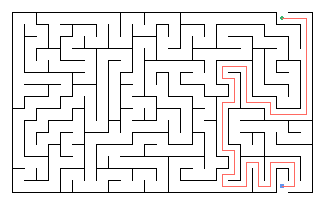

In [4]:
from rectangular_maze.a_star import a_star

# Find the shortest path
shortest_path = a_star(grid, start, end)

# Draw the maze image with the shortest path
draw_maze(grid, start, end, path=shortest_path, filename="maze_example/maze_solution.png", cell_size=12)

# Load image from file
img = Image(filename="maze_example/maze_solution.png")

# Display the image
display(img)